In [578]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [643]:
X = pd.read_csv("data/application_data.csv")
prev = pd.read_csv("data/previous_application.csv")
y = X['TARGET']
X.drop(columns='TARGET', inplace=True)


In [631]:
pd.set_option('display.max_rows', None)
print(X.shape)
display(X.dtypes.to_frame(name = 'dtype'))
pd.reset_option("display.max_rows")


(307511, 121)


,dtype
SK_ID_CURR,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64
AMT_GOODS_PRICE,float64


In [632]:
pd.set_option('display.max_rows', None)
print(prev.shape)
display(prev.dtypes.to_frame(name = 'dtype'))
pd.reset_option("display.max_rows")


(1670214, 37)


,dtype
SK_ID_PREV,int64
SK_ID_CURR,int64
NAME_CONTRACT_TYPE,object
AMT_ANNUITY,float64
AMT_APPLICATION,float64
AMT_CREDIT,float64
AMT_DOWN_PAYMENT,float64
AMT_GOODS_PRICE,float64
WEEKDAY_APPR_PROCESS_START,object
HOUR_APPR_PROCESS_START,int64


## Target 

In [633]:
def plot_target_distribution(y, labels=None, colors=None, title="Distribution of Target", kind="both"):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)

    counts = y.value_counts().sort_index()
    percentages = (counts / len(y)) * 100

    if labels is None:
        labels = [str(val) for val in counts.index]
    if colors is None:
        colors = sns.color_palette("Set2", len(counts)).as_hex()

    if kind == "both":
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        percentages.plot(kind="bar", color=colors, edgecolor="black", ax=ax1)
        ax1.set_title(f"{title} (%)", fontsize=14, weight="bold")
        ax1.set_ylabel("Percentage")
        ax1.set_xlabel("Class")
        ax1.grid(axis="y", alpha=0.3)

        ax2.pie(counts, labels=labels, autopct="%1.1f%%", colors=colors,
                startangle=90, wedgeprops={"edgecolor": "black"})
        ax2.set_title(title, fontsize=14, weight="bold")

        plt.tight_layout()
        plt.show()

    elif kind == "bar":
        plt.figure(figsize=(6, 4))
        percentages.plot(kind="bar", color=colors, edgecolor="black")
        plt.title(f"{title} (%)", fontsize=14, weight="bold")
        plt.ylabel("Percentage")
        plt.xlabel("Class")
        plt.grid(axis="y", alpha=0.3)
        plt.show()

    elif kind == "pie":
        plt.figure(figsize=(5, 5))
        plt.pie(counts, labels=labels, autopct="%1.1f%%", colors=colors,
                startangle=90, wedgeprops={"edgecolor": "black"})
        plt.title(title, fontsize=14, weight="bold")
        plt.show()

    else:
        raise ValueError("kind must be 'both', 'pie', or 'bar'")


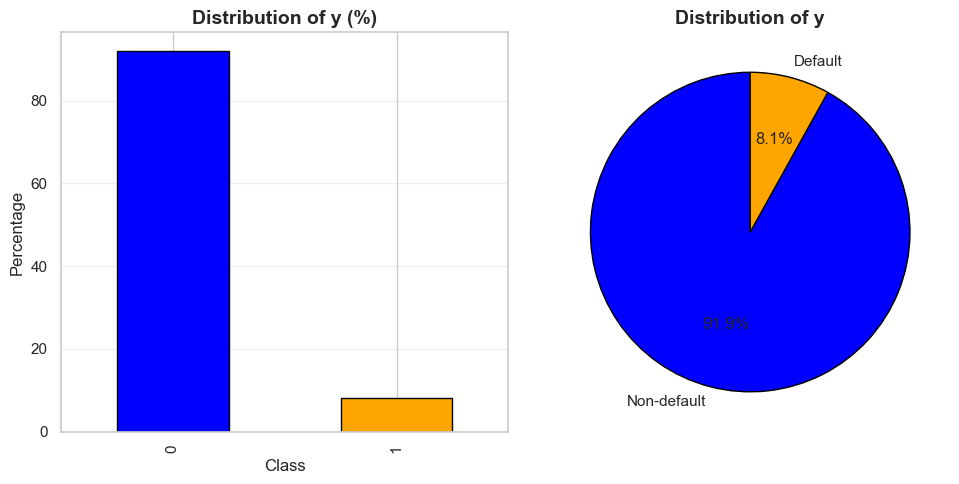

In [634]:
plot_target_distribution(y, labels=['Non-default', 'Default'], colors=['blue', 'orange'], title="Distribution of y", kind="both")

## Null value analysis:

In [635]:
def count_nvalues(df, p : float = 0) :
    pd.set_option("display.max_rows", None)
    u = (df.isna().sum() / len(df) * 100).to_frame(name = "%nan").sort_values(by ="%nan", ascending = False)
    display(u)
    pd.reset_option("display.max_rows")
    to_drop  = u[u["%nan"] > p].index.to_list()
    return to_drop

In [650]:
to_drop = count_nvalues(X, p = 30)
X.drop(columns=to_drop, inplace=True)
nan_columns = X.columns[X.isnull().any()]
features = X.columns.to_list()

,%nan
EXT_SOURCE_3,19.825307
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_HOUR,13.501631
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_YEAR,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631
NAME_TYPE_SUITE,0.420148
OBS_30_CNT_SOCIAL_CIRCLE,0.332021
DEF_30_CNT_SOCIAL_CIRCLE,0.332021


## Categorical Feature

In [651]:
cat_features = X.columns[X.dtypes == object].to_list()
num_features = X.columns[X.dtypes != object].to_list()
id_col = "SK_ID_CURR"
features.remove(id_col)
num_features.remove(id_col)
discreate_num_features = [name for name in num_features if X[name].nunique()<35]
continous_features = [name for name in num_features if name not in discreate_num_features]

In [652]:
print(f"cat_features : (size = {len(cat_features)})", cat_features)
print(f"discreate_num_features : (size = {len(discreate_num_features)})", discreate_num_features)
print(f"continous_features : (size = {len(continous_features)})", continous_features)

cat_features : (size = 11) ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
discreate_num_features : (size = 47) ['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_1

In [654]:
# Categorical Values

print("Count NaN values for Categorical Feature")
count_nvalues(X[cat_features])
X['NAME_TYPE_SUITE'].fillna(value = 'Unaccompanied', inplace = True)

print("------------")

print("Unique Values for Categorical Values ")
pd.reset_option("display.max_rows")
display(X[cat_features].nunique())
print("CODE_GENDER Values", X['CODE_GENDER'].unique())
X['CODE_GENDER'].replace(to_replace="XNA", value=X['CODE_GENDER'].mode()[0], inplace=True)
X['NAME_FAMILY_STATUS'].replace(to_replace="Unknown", value = "Single / not married")
X.drop(columns="ORGANIZATION_TYPE", inplace=True)
features.remove("ORGANIZATION_TYPE")
cat_features.remove("ORGANIZATION_TYPE")


Count NaN values for Categorical Feature


,%nan
NAME_TYPE_SUITE,0.420148
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
NAME_INCOME_TYPE,0.000000
NAME_EDUCATION_TYPE,0.000000
NAME_FAMILY_STATUS,0.000000
NAME_HOUSING_TYPE,0.000000
WEEKDAY_APPR_PROCESS_START,0.000000


------------
Unique Values for Categorical Values 


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

CODE_GENDER Values ['M' 'F' 'XNA']


In [655]:
def target_rate_by_category(X, y, features, n_cols=3, palette="pastel"):
    n_rows = int(np.ceil(len(features) / n_cols))
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(features):
        sns.barplot(
            x=col, y=y, data=X,
            estimator=lambda v: sum(v)/len(v),
            ax=axes[i], palette=palette, edgecolor="black"
        )
        axes[i].set_title(col, fontsize=11, weight="bold")
        axes[i].set_ylabel("Default rate")
        axes[i].set_xlabel("")
        axes[i].tick_params(axis="x", labelrotation=30)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
    return


KeyboardInterrupt: 

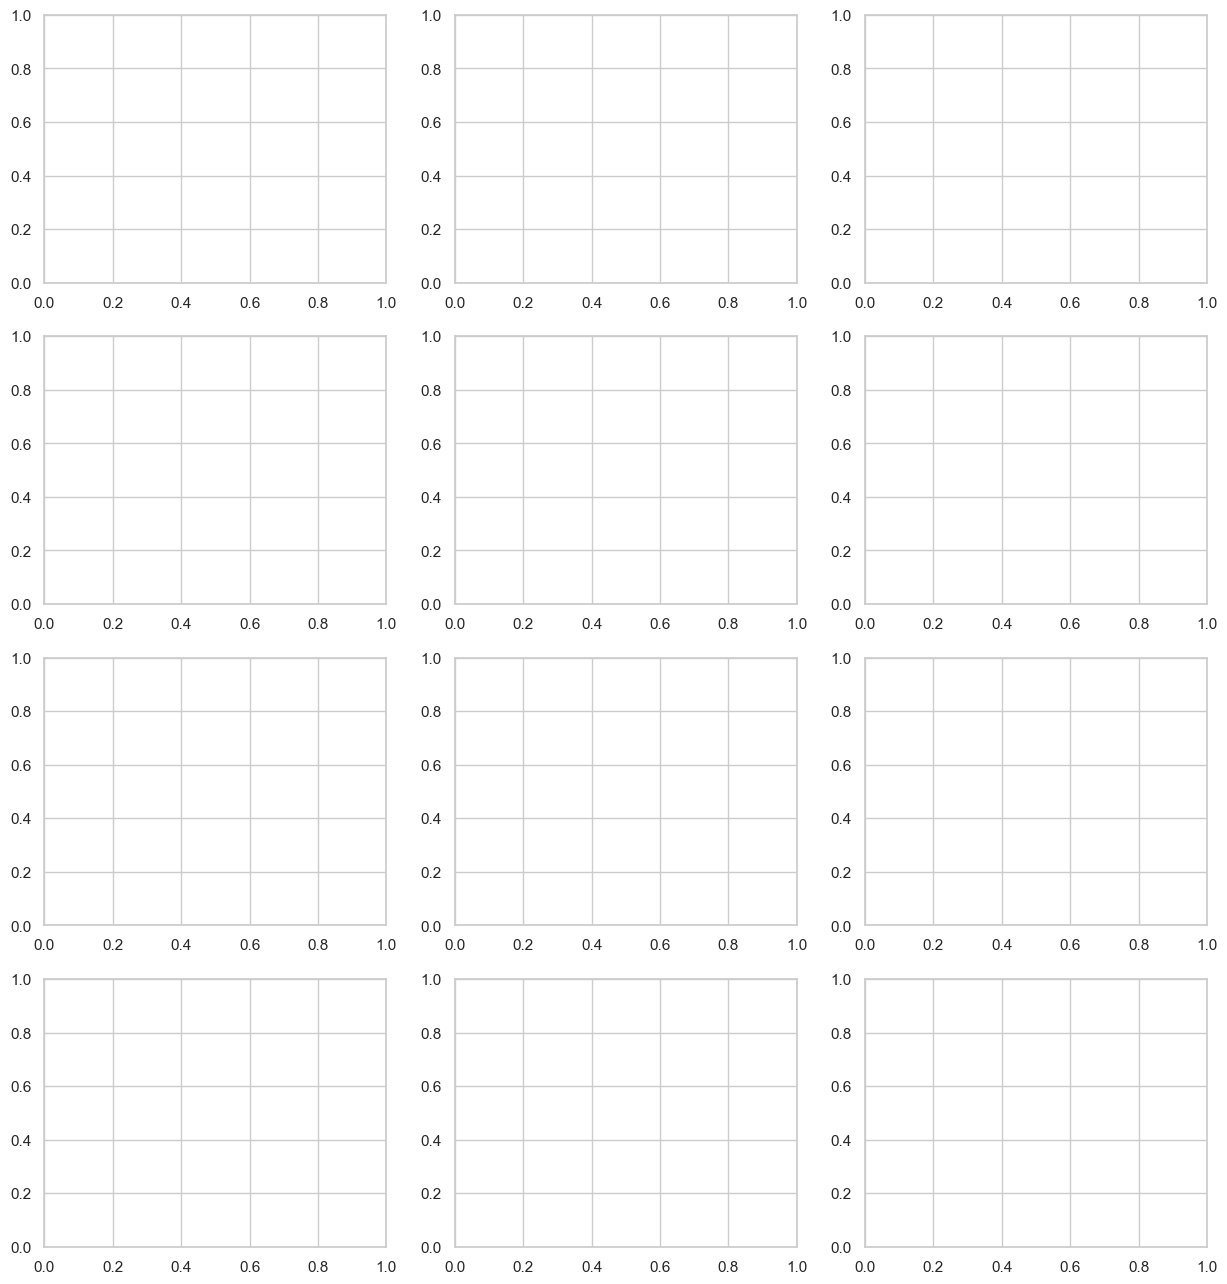

In [656]:
target_rate_by_category(X, y, cat_features, n_cols=3)

In [657]:
X.drop(columns=["WEEKDAY_APPR_PROCESS_START", "NAME_TYPE_SUITE"], inplace = True)

In [658]:
def value_wise_defaulter_percentage(df, col):
    new_df = pd.DataFrame(columns=['Value', 'Percentage of Defaulter'])
    for value in df[col].unique():
        default_cnt = df[(df[col] == value) & (df.TARGET == 1)].shape[0]
        total_cnt = df[df[col] == value].shape[0]
        new_df = new_df.append({'Value' : value , 'Percentage of Defaulter' : (default_cnt*100/total_cnt)}, ignore_index=True)
    return new_df.sort_values(by='Percentage of Defaulter', ascending=False)

## Discreate Numerical Feature

In [659]:
for name in discreate_num_features :
    if X[name].isnull().any() :
        print(name, X[name].isna().sum()) 
AMT_REQ_features  = [name for name in discreate_num_features if "AMT" in name]
X[AMT_REQ_features] = X[AMT_REQ_features].apply(lambda x: x.fillna(x.mode()[0]))
X["CNT_FAM_MEMBERS"].fillna(0, inplace=True)
SOCIAL_CIRCLE = [name for name in discreate_num_features if "SOCIAL_CIRCLE" in name]
for name in SOCIAL_CIRCLE :
    X[name].fillna(X[name].mode()[0], inplace=True)

CNT_FAM_MEMBERS 2
OBS_30_CNT_SOCIAL_CIRCLE 1021
DEF_30_CNT_SOCIAL_CIRCLE 1021
OBS_60_CNT_SOCIAL_CIRCLE 1021
DEF_60_CNT_SOCIAL_CIRCLE 1021
AMT_REQ_CREDIT_BUREAU_HOUR 41519
AMT_REQ_CREDIT_BUREAU_DAY 41519
AMT_REQ_CREDIT_BUREAU_WEEK 41519
AMT_REQ_CREDIT_BUREAU_MON 41519
AMT_REQ_CREDIT_BUREAU_QRT 41519
AMT_REQ_CREDIT_BUREAU_YEAR 41519


In [660]:
def plot_heatmap(df, columns=None, cmap="Reds", vmin=0, vmax=None, title="Correlation Heatmap", show_labels=True):
    data = df[columns] if columns is not None else df.select_dtypes("number")
    corr = data.corr()
    n = corr.shape[0]
    
    if show_labels:
        figsize = (max(8, n * 0.6), max(5, n * 0.6))
    else:
        figsize = (max(3, n * 0.2), max(3, n * 0.2))

    plt.figure(figsize=figsize)
    sns.heatmap(
        corr,
        annot=(n <= 15),
        cmap=cmap,
        vmin=vmin,
        vmax=vmax,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8},
        xticklabels=show_labels,
        yticklabels=show_labels
    )
    if show_labels:
        plt.xticks(rotation=45, ha="right")
        plt.yticks(rotation=45)
    else:
        plt.xticks([])
        plt.yticks([])
    plt.title(title, fontsize=13, weight="bold", pad=10)
    plt.tight_layout()
    plt.show()


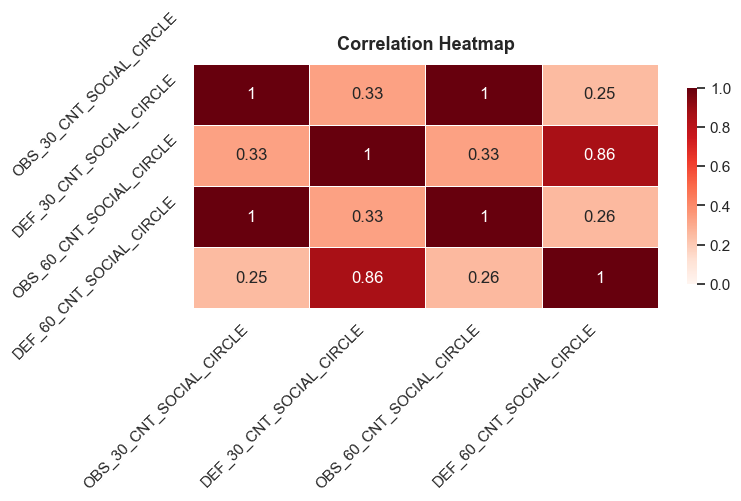

In [661]:
plot_heatmap(X, columns=SOCIAL_CIRCLE)
X.drop(columns = SOCIAL_CIRCLE[:2], inplace=True)
for name in SOCIAL_CIRCLE[:2] :
    features.remove(name)
    discreate_num_features.remove(name)
    num_features.remove(name)
SOCIAL_CIRCLE = SOCIAL_CIRCLE[2:]

In [662]:
X[discreate_num_features].nunique().to_frame().head(50)

,0
CNT_CHILDREN,15
FLAG_MOBIL,2
FLAG_EMP_PHONE,2
FLAG_WORK_PHONE,2
FLAG_CONT_MOBILE,2
FLAG_PHONE,2
FLAG_EMAIL,2
CNT_FAM_MEMBERS,18
REGION_RATING_CLIENT,3
REGION_RATING_CLIENT_W_CITY,3


KeyboardInterrupt: 

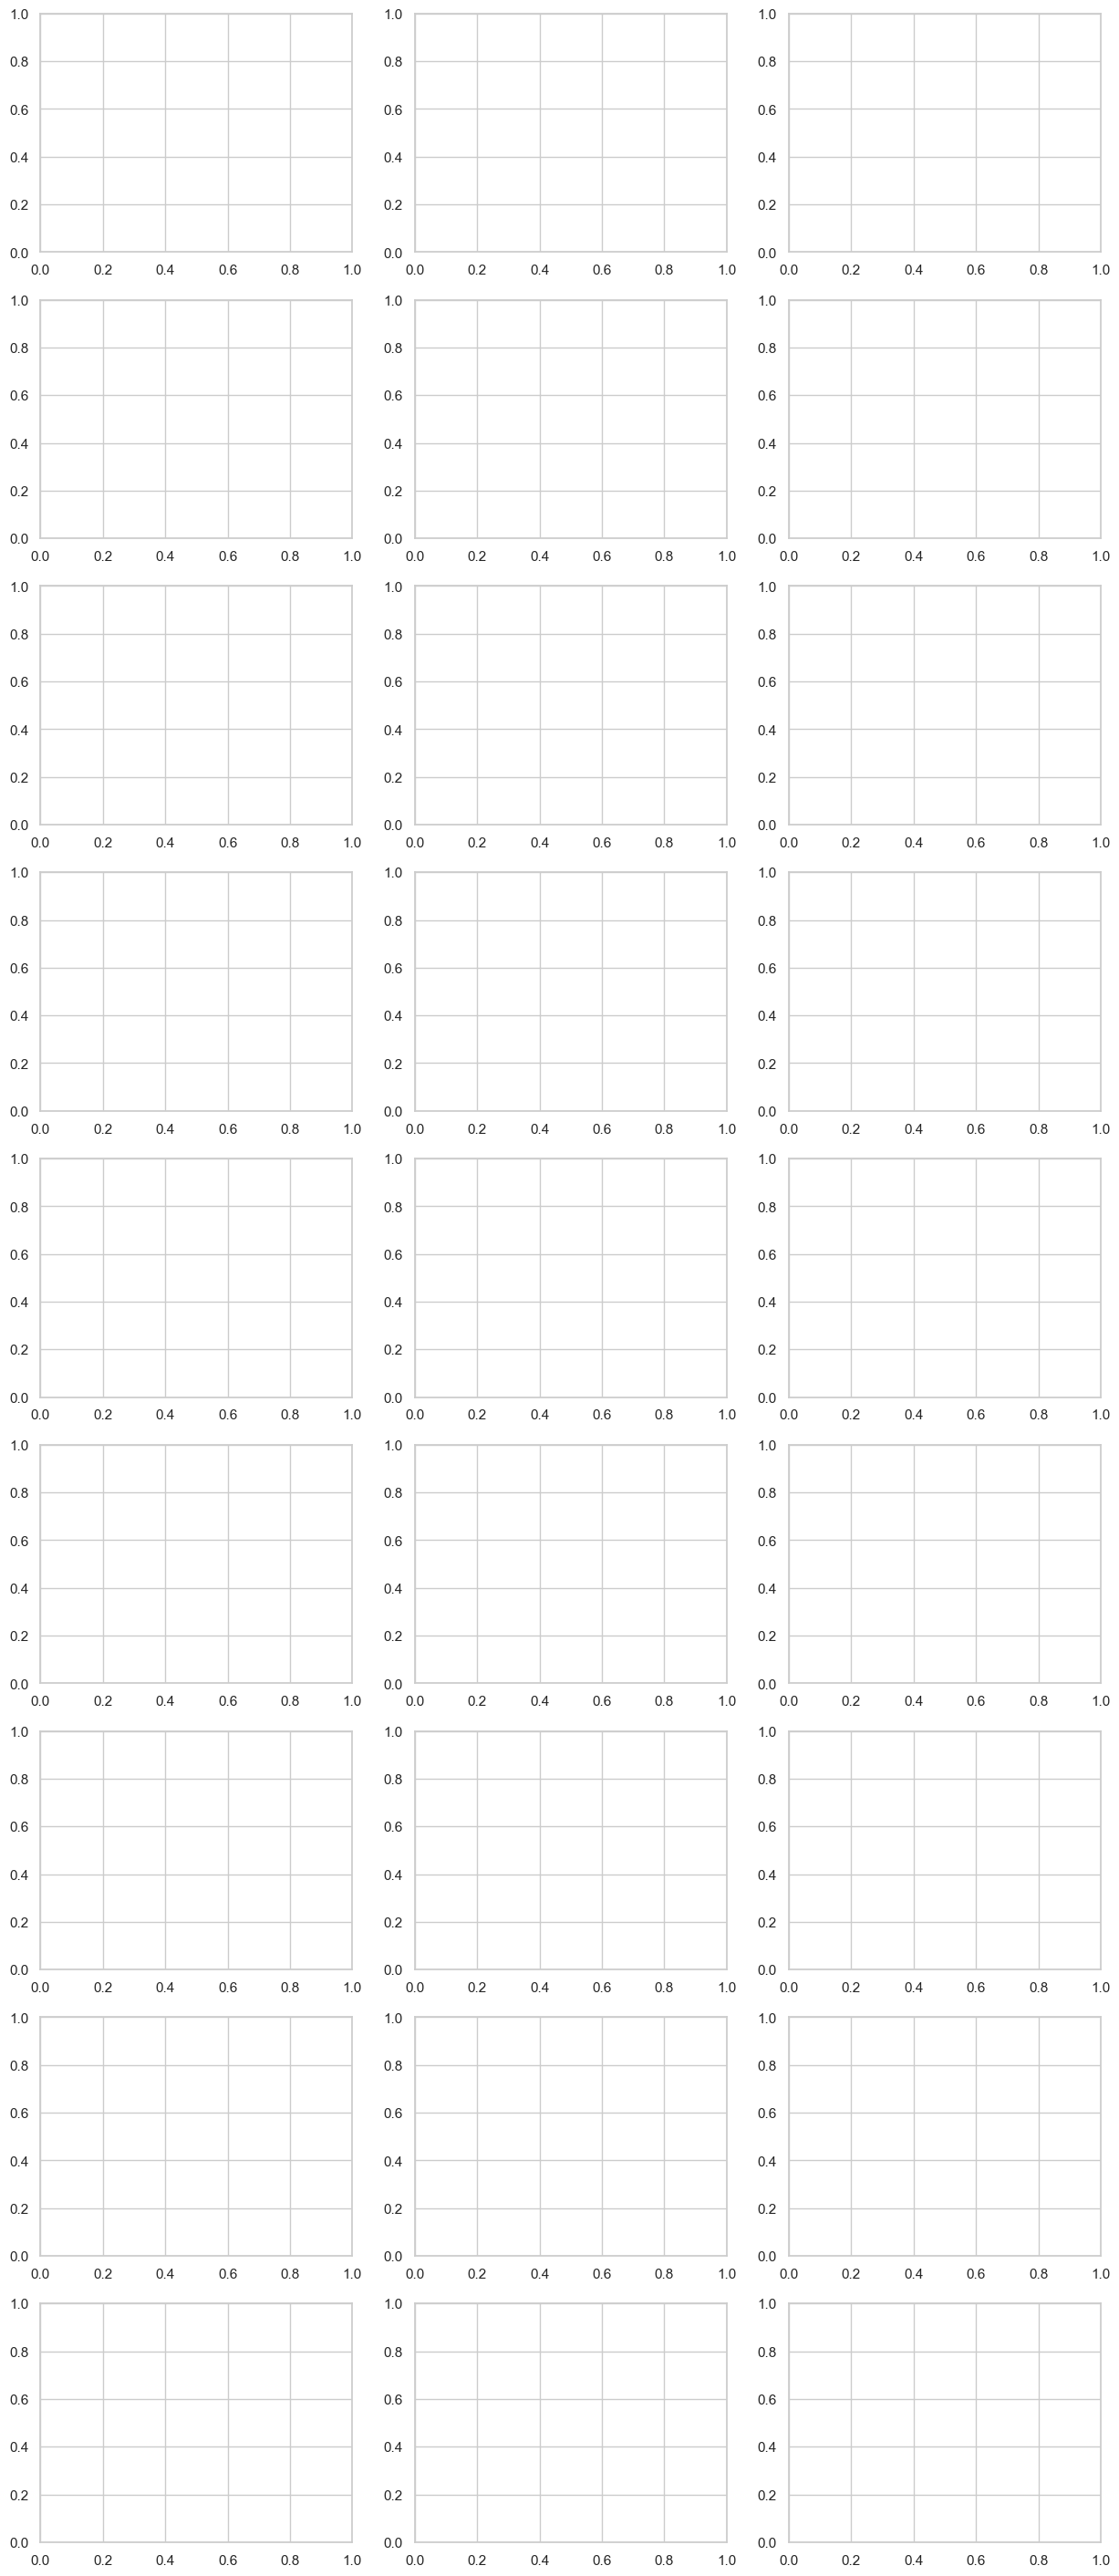

In [663]:
# FLAG features
FLAG_features = [name for name in discreate_num_features if "FLAG" in name]
target_rate_by_category(X, y, FLAG_features)

In [664]:
to_drop = ["FLAG_MOBIL", "FLAG_EMAIL", "FLAG_CONT_MOBILE", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_12"]
X.drop(columns=to_drop, inplace=True)
num_features = list(set(num_features) - set(to_drop))
discreate_num_features = list(set(discreate_num_features) - set(to_drop))
FLAG_features = list(set(FLAG_features) - set(to_drop))

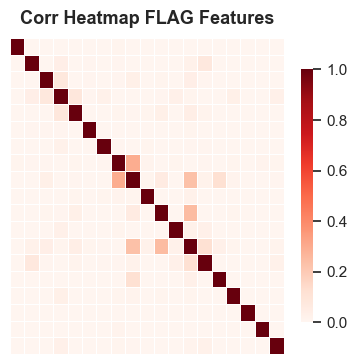

In [601]:
plot_heatmap(X, columns=FLAG_features, show_labels=False, title="Corr Heatmap FLAG Features")

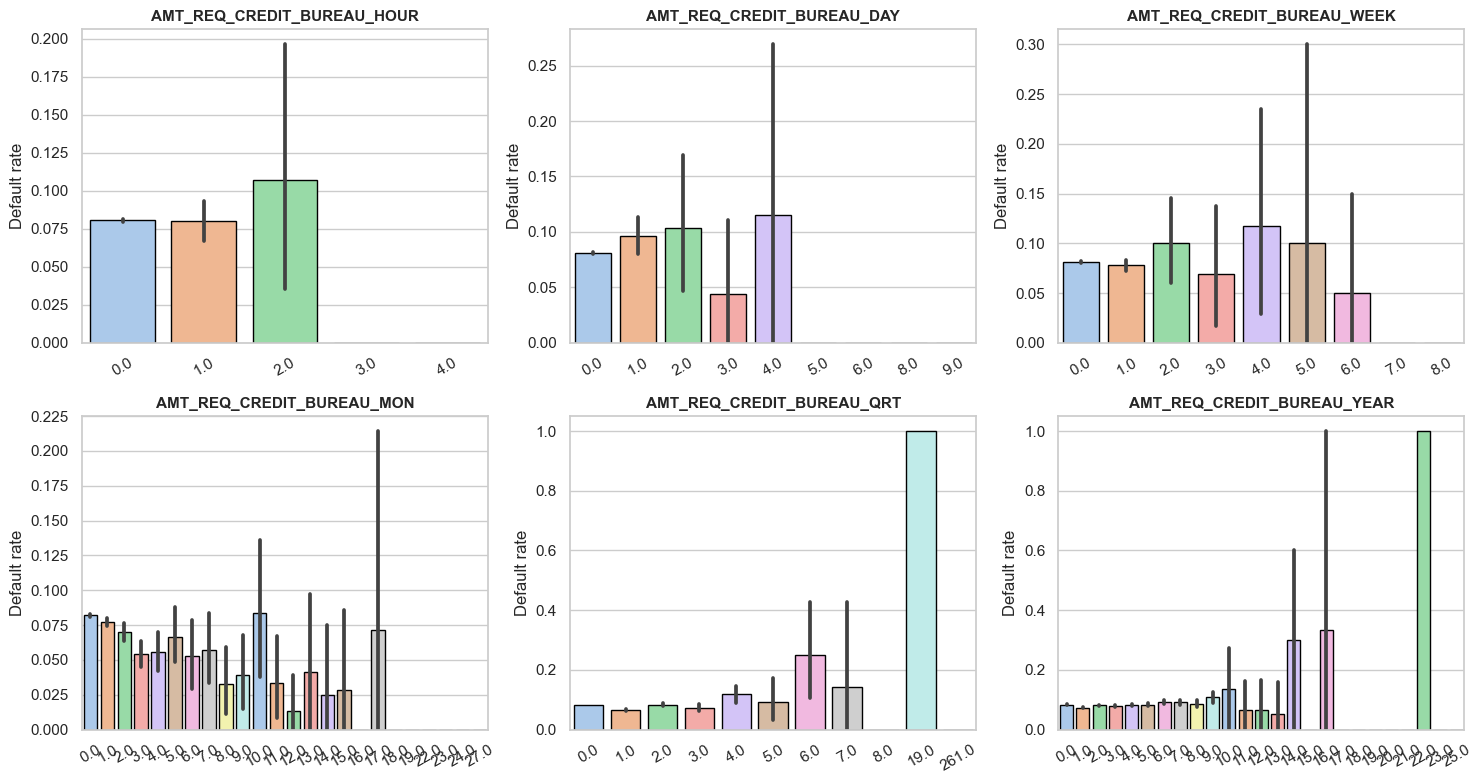

In [602]:
target_rate_by_category(X, y, features=AMT_REQ_features)

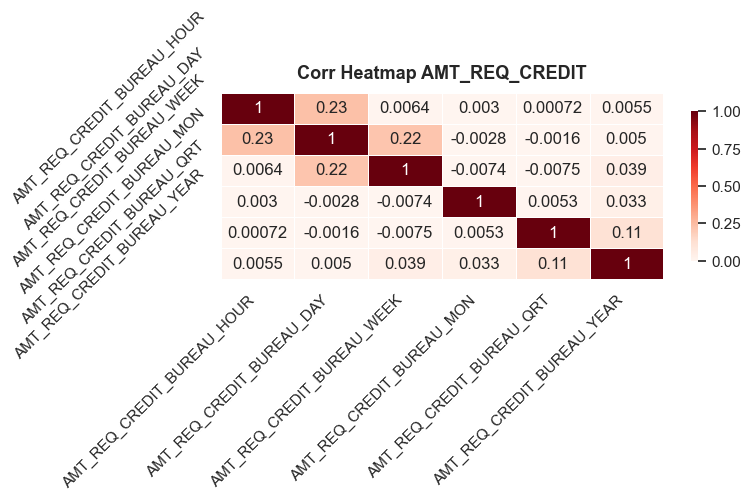

In [603]:
plot_heatmap(X, columns=AMT_REQ_features, title="Corr Heatmap AMT_REQ_CREDIT")

In [604]:
# # Filter out non-numeric columns
# numeric_columns = df_temp.drop(columns=non_numeric_columns)

# # Calculate the correlation
# correlation = numeric_columns.corr()['loan_status']

# # Plot the correlations
# plt.figure(figsize=(10, 6), dpi=120)
# correlation.sort_values().drop('loan_status').plot(kind='bar', cmap='viridis')
# plt.title('Correlation with loan_status for continuous features (non-numeric columns excluded)')
# plt.xticks(rotation=90)
# plt.show()


# Continous Features

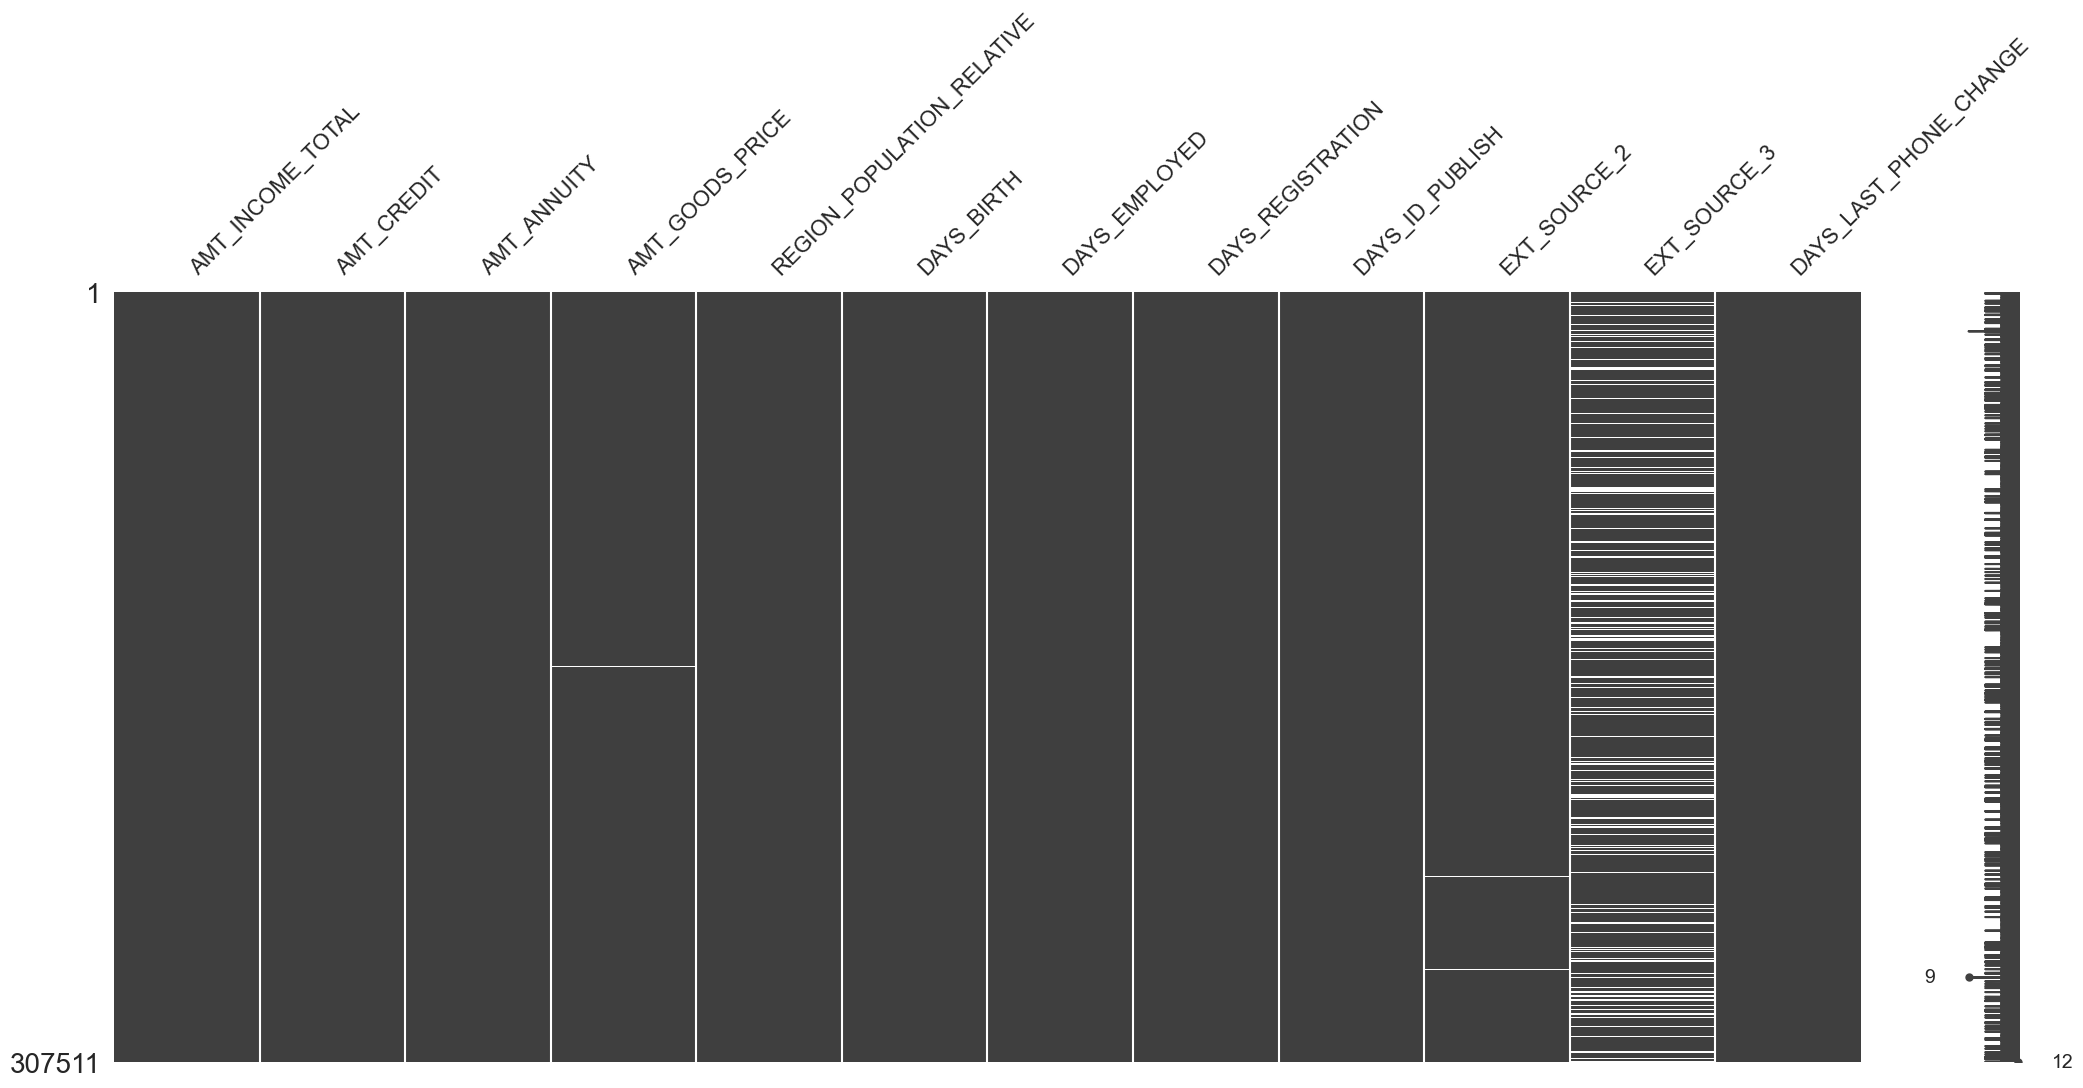

In [605]:
import missingno as msno
import matplotlib.pyplot as plt
msno.matrix(X[continous_features])
plt.xticks()
plt.show()

In [666]:
X['AMT_GOODS_PRICE'].fillna(X['AMT_GOODS_PRICE'].median(), inplace=True)
X['AMT_ANNUITY'].fillna(X['AMT_ANNUITY'].median(), inplace=True)
X['EXT_SOURCE_2'].fillna(X['EXT_SOURCE_2'].median(), inplace=True)
X['EXT_SOURCE_3'].fillna(X['EXT_SOURCE_3'].median(), inplace=True)
EXT_SOURCE_feature = ['EXT_SOURCE_2', 'EXT_SOURCE_3']

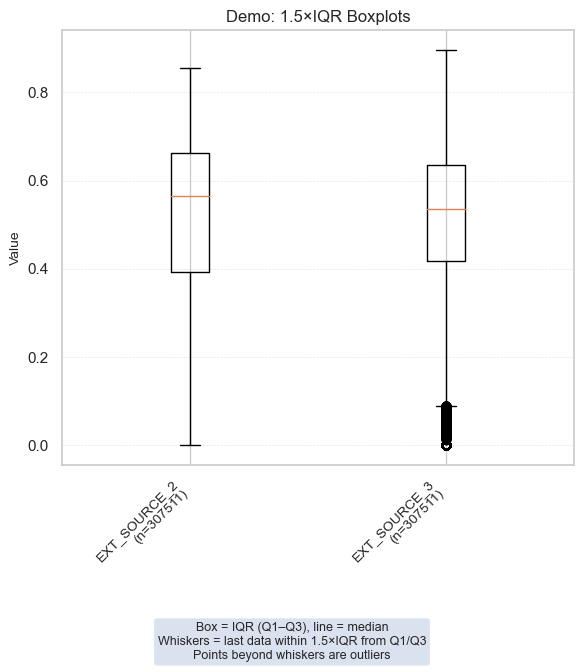

In [667]:
def boxplot_features(df, features, title="Boxplots", annotate=True, show_outliers=True, fontsize=10):

    if isinstance(features, (str, int)):
        features = [features]
        
    cols = [c for c in features if c in df.columns]
    if not cols:
        raise ValueError("None of the requested features are in the DataFrame.")
    
    data = []
    ns = []
    for c in cols:
        s = pd.to_numeric(df[c], errors="coerce").dropna()
        if s.size > 0:
            data.append(s.values)
            ns.append(s.size)
    
    width = max(6, min(22, 1.2 * len(cols)))
    fig, ax = plt.subplots(figsize=(width, 6))
    
    ax.boxplot(
        data, 
        vert=True, 
        whis=1.5, 
        showfliers=show_outliers,
        patch_artist=False
    )
    
    xtick_labels = [f"{c}\n(n={n})" for c, n in zip(cols, ns)]
    ax.set_xticks(np.arange(1, len(cols) + 1))
    ax.set_xticklabels(xtick_labels, rotation=45, ha="right", fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize+2)
    ax.set_ylabel("Value", fontsize=fontsize)
    ax.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

    if annotate:
        explanation = (
            "Box = IQR (Q1–Q3), line = median\n"
            "Whiskers = last data within 1.5×IQR from Q1/Q3\n"
            "Points beyond whiskers are outliers"
        )
        # Place below the x-axis
        fig.text(
            0.5, -0.05, explanation, 
            ha="center", va="top", fontsize=fontsize-1,
            bbox=dict(boxstyle="round", alpha=0.2)
        )
    
    fig.tight_layout()
    plt.show()



boxplot_features(X, EXT_SOURCE_feature, title="Demo: 1.5×IQR Boxplots")


In [668]:
# We delete the outliers
X = X[X['EXT_SOURCE_3'] >  np.nanpercentile(X['EXT_SOURCE_3'], 2)]

In [669]:
AMT_Money = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

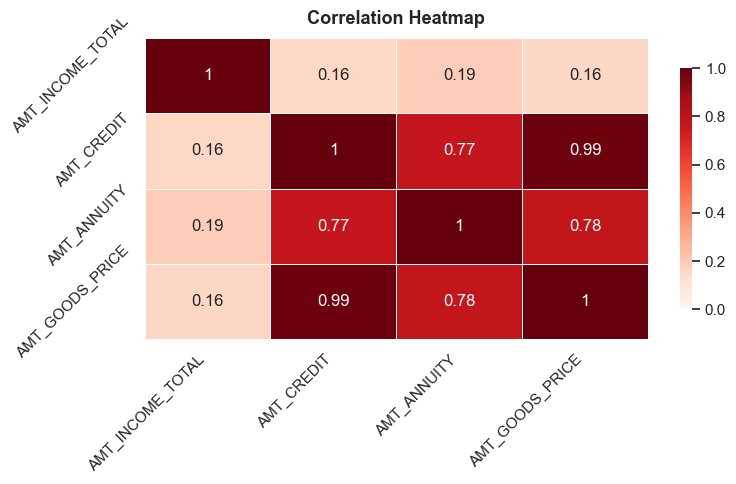

In [670]:
plot_heatmap(X, columns=AMT_Money)

In [671]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools

def scatter_matrix_with_target(
    df,
    features,
    y=None,
    max_plots=25,
    figsize=(10, 10),
    alpha=0.8,
    cmap="Set2",
    colors=None,
    s=30
):
    """
    Plot scatter plots for all feature pairs, optionally colored by class labels (y).

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing features.
    features : list of str
        Names of numeric columns to compare pairwise.
    y : pandas.Series or array-like, optional
        Class labels for coloring. If None, plots are not colored by class.
    max_plots : int, optional
        Maximum number of feature pairs to show (default 25).
    figsize : tuple, optional
        Figure size.
    alpha : float, optional
        Transparency of scatter points.
    cmap : str, optional
        Matplotlib colormap name (default 'Set2').
    colors : list, optional
        List of colors to use instead of a colormap (e.g., ['blue', 'orange']).
    s : int, optional
        Marker size.
    """
    # Validate features
    features = [f for f in features if f in df.columns]
    if len(features) < 2:
        raise ValueError("At least two valid features are required.")
    X = df[features]

    # Determine target mode
    has_target = y is not None
    continuous = False
    if has_target:
        y = pd.Series(y, index=df.index, name="target")
        if pd.api.types.is_numeric_dtype(y):
            unique_vals = np.unique(y)
            continuous = len(unique_vals) > 10
        else:
            continuous = False

        if not continuous:
            unique_classes = np.unique(y)
            if colors is not None:
                colors = colors[:len(unique_classes)]
            else:
                cmap_obj = plt.cm.get_cmap(cmap, len(unique_classes))
                colors = cmap_obj(np.arange(len(unique_classes)))
        else:
            cmap_obj = plt.cm.get_cmap(cmap)
    else:
        colors = ["steelblue"]

    # Build feature pairs
    pairs = list(itertools.combinations(features, 2))
    if len(pairs) > max_plots:
        pairs = pairs[:max_plots]
        print(f"Showing only the first {max_plots} feature pairs for clarity.")

    n = len(pairs)
    ncols = int(np.ceil(np.sqrt(n)))
    nrows = int(np.ceil(n / ncols))

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).flatten()

    for ax, (f1, f2) in zip(axes, pairs):
        if has_target:
            if continuous:
                sc = ax.scatter(
                    X[f1], X[f2], c=y, cmap=cmap_obj, alpha=alpha,
                    s=s, edgecolors='k', linewidths=0.6
                )
            else:
                for c, col in zip(unique_classes, colors):
                    mask = y == c
                    ax.scatter(
                        X.loc[mask, f1], X.loc[mask, f2],
                        edgecolors=col, facecolors='none',
                        alpha=alpha, label=str(c), s=s, linewidths=0.9
                    )
        else:
            ax.scatter(X[f1], X[f2], color=colors[0], alpha=alpha, s=s)

        ax.set_xlabel(f1)
        ax.set_ylabel(f2)
        ax.grid(True, linestyle='--', linewidth=0.3, alpha=0.5)

    # Hide unused subplots
    for ax in axes[len(pairs):]:
        ax.axis("off")

    # Legend or colorbar
    if has_target:
        if continuous:
            fig.colorbar(sc, ax=axes.tolist(), shrink=0.6, label=y.name or "target")
        else:
            handles, labels = axes[0].get_legend_handles_labels()
            fig.legend(handles, labels, title=y.name or "class", loc='upper right')

    title = "Pairwise Scatter Plots"
    if has_target:
        title += " Colored by Class"
    fig.suptitle(title, fontsize=13, y=1.02)
    fig.tight_layout()
    plt.show()


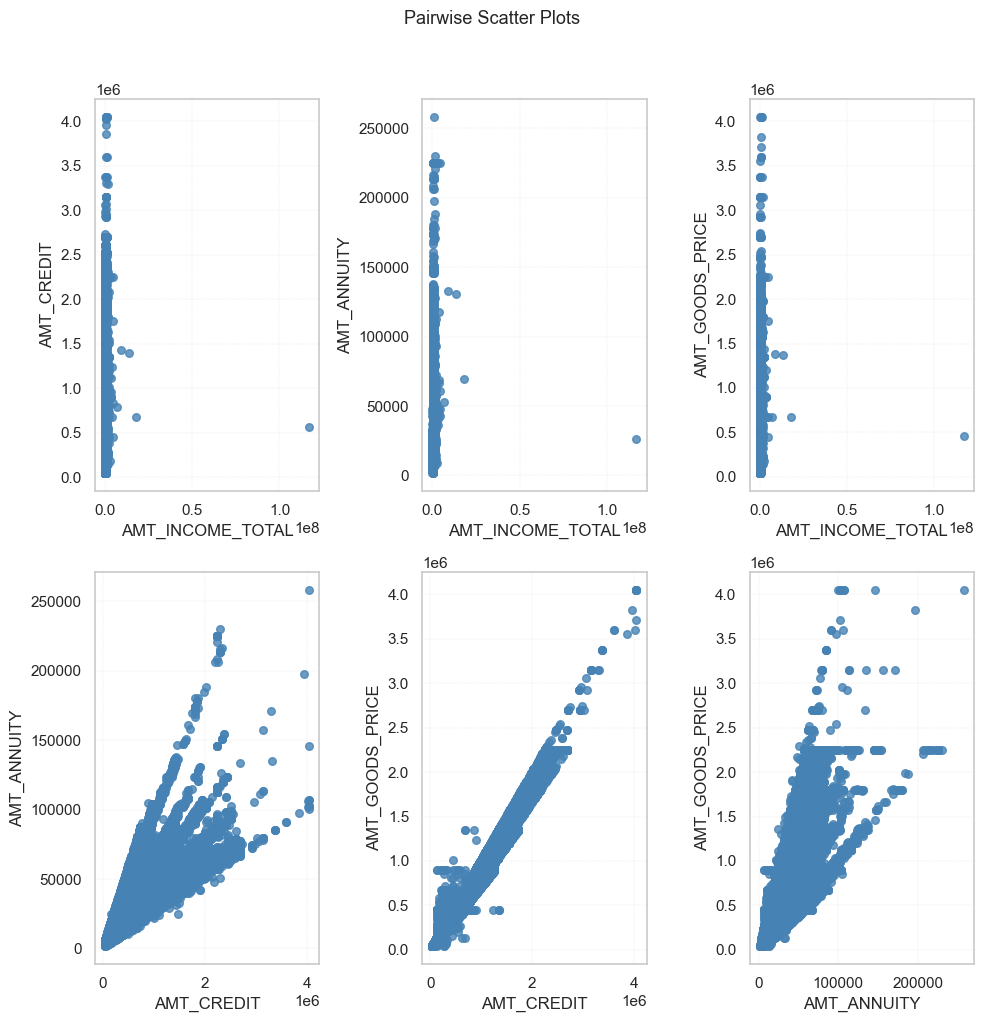

In [612]:
scatter_matrix_with_target(X, AMT_Money, colors = ['blue'])

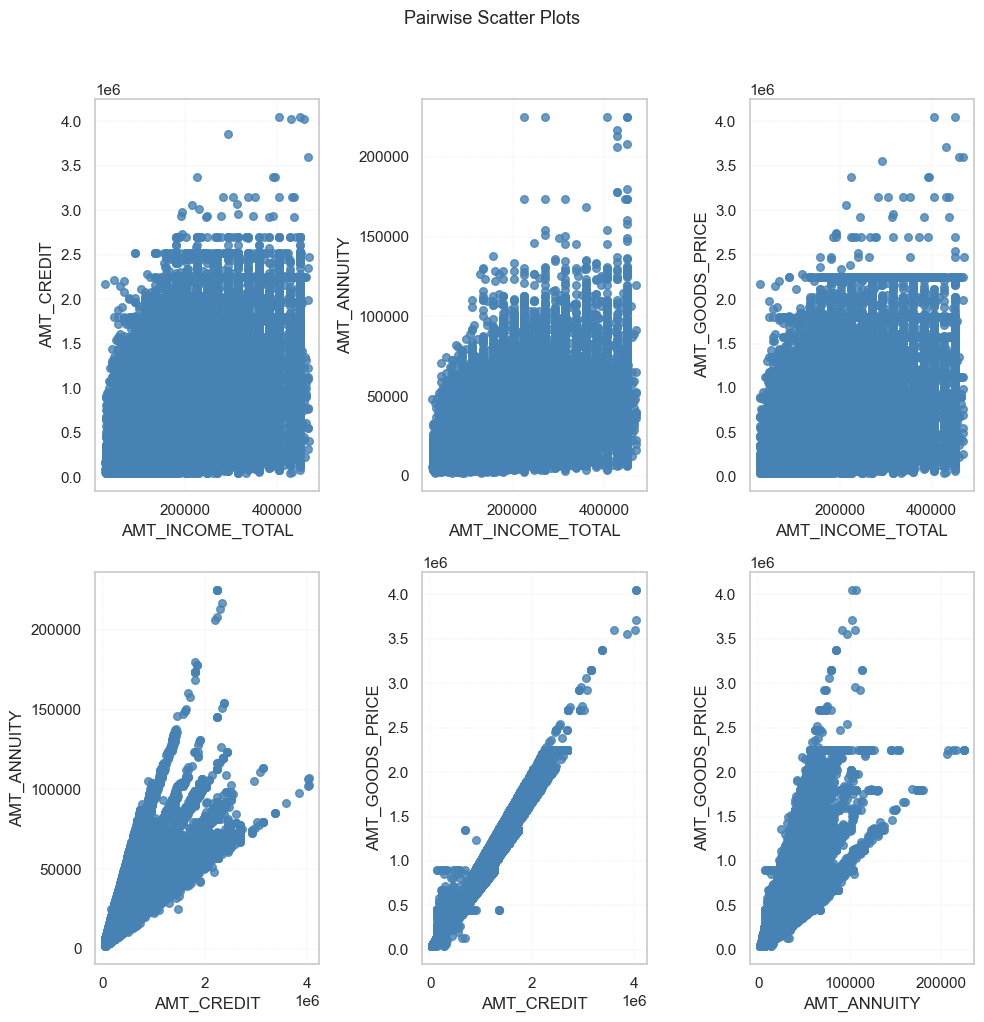

In [672]:
# Remove outlier for AMT_INCOME_TOTAL
X = X[X['AMT_INCOME_TOTAL'] < np.nanpercentile(X['AMT_INCOME_TOTAL'], 99)]
scatter_matrix_with_target(X, AMT_Money, colors = ['blue'])


In [614]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_conditional_distributions(
    X, features, y, labels=None, figsize=(12, 6), sharey=True
):
    """
    Plot P(X | Y) for given features.

    Parameters
    ----------
    X : pd.DataFrame
        DataFrame containing features.
    features : list
        List of feature names to plot.
    y : pd.Series or np.ndarray
        Binary target variable (e.g. 0/1).
    labels : list or tuple, optional
        Custom labels for the two classes, e.g. ['Non-defaulter', 'Defaulter'].
        If None, defaults to ['Y=0', 'Y=1'].
    figsize : tuple, optional
        Figure size for each feature's plot (default (12, 6)).
    sharey : bool, optional
        Whether to share the y-axis between subplots.
    """
    # Default labels
    if labels is None:
        labels = ['Y=0', 'Y=1']
    if len(labels) != 2:
        raise ValueError("labels must be a list or tuple of length 2.")

    # Ensure index alignment
    X = X.reset_index(drop=True)
    y = pd.Series(y).reset_index(drop=True)

    for feature in features:
        if feature not in X.columns:
            print(f"Warning: Feature '{feature}' not found in DataFrame.")
            continue

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize, sharey=sharey)
        fig.suptitle(f"P({feature} | Y)", fontsize=14, fontweight='bold')

        sns.kdeplot(
            X.loc[y == 0, feature],
            ax=ax1,
            fill=True,
            color='steelblue',
            label=labels[0],
        )
        sns.kdeplot(
            X.loc[y == 1, feature],
            ax=ax2,
            fill=True,
            color='darkorange',
            label=labels[1],
        )

        ax1.set_title(f"{feature} | {labels[0]}")
        ax2.set_title(f"{feature} | {labels[1]}")

        for ax in [ax1, ax2]:
            ax.legend()
            ax.grid(True, linestyle='--', alpha=0.5)

        plt.tight_layout()
        plt.show()


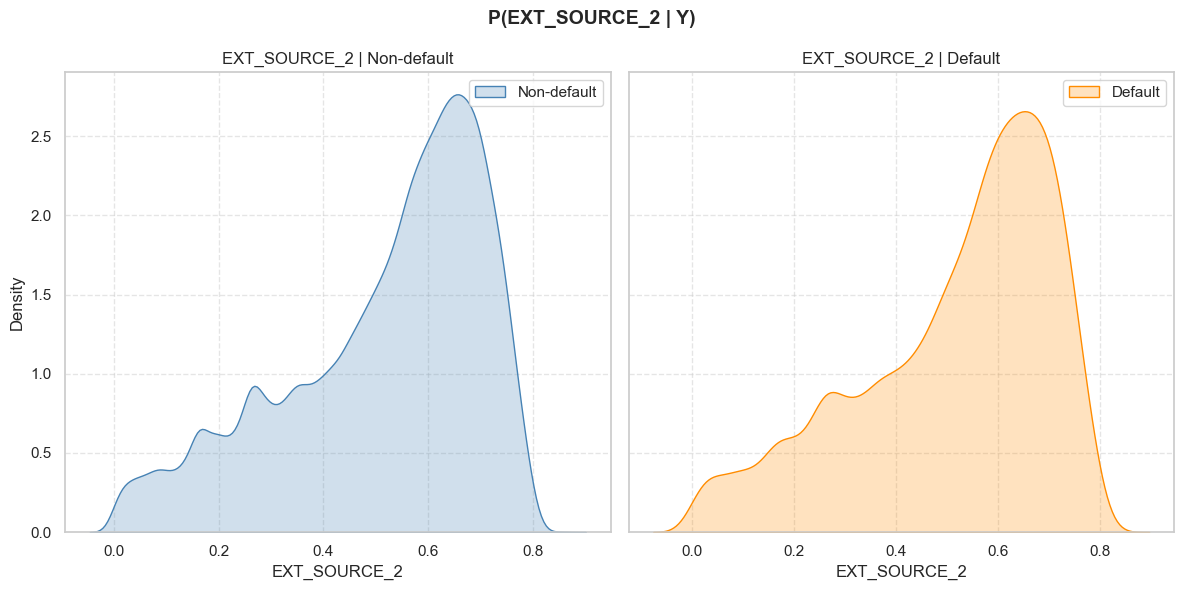

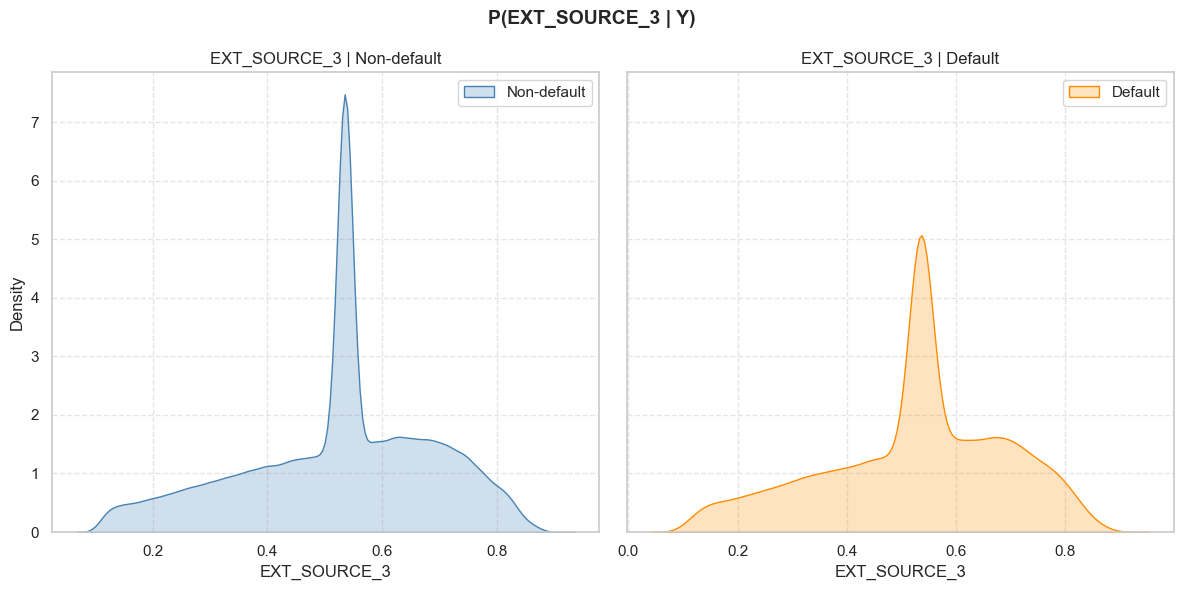

In [673]:
plot_conditional_distributions(X, EXT_SOURCE_feature, y, labels=['Non-default', 'Default'])

In [674]:
others = ['REGION_POPULATION_RELATIVE',  'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE']

In [675]:
X['AGE'] =  X['DAYS_BIRTH'] / 365
X['YEAR_EMPLOYED'] = X['DAYS_EMPLOYED'] / 365
X['YEARS_REGISTRATION'] = X['DAYS_REGISTRATION'] / 365
X['YEARS_ID_PUBLISH'] = X['DAYS_ID_PUBLISH'] / 365
X['YEARS_LAST_PHONE_CHANGE'] = X['DAYS_LAST_PHONE_CHANGE'] / 365
X.drop(columns=others[1:], inplace=True)


In [677]:
features = X.columns.to_list()
cat_features = X.columns[X.dtypes == object].to_list()
num_features = X.columns[X.dtypes != object].to_list()
id_col = "SK_ID_CURR"
features.remove(id_col)
num_features.remove(id_col)
discreate_num_features = [name for name in num_features if X[name].nunique()<35]
continous_features = [name for name in num_features if name not in discreate_num_features]

In [623]:
df = pd.merge(X, prev, how="inner", on = "SK_ID_CURR")

In [624]:
df.shape

(1365541, 95)

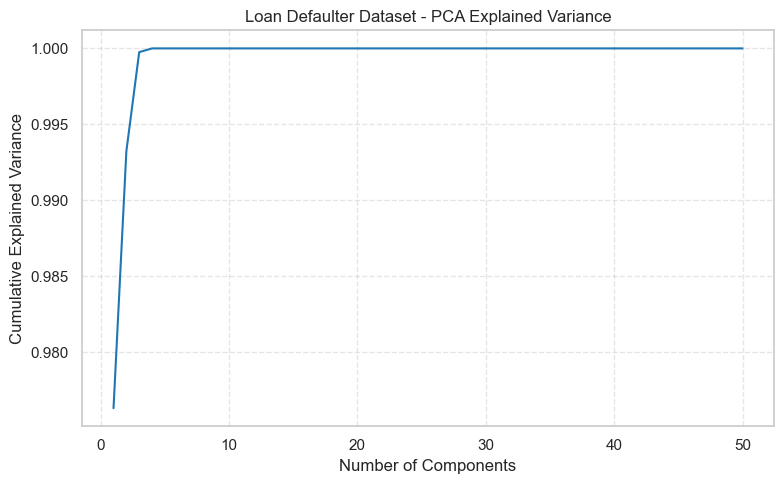

In [ ]:
from sklearn.decomposition import PCA

Z = X[num_features]

# Fit PCA model
pca = PCA().fit(Z)

# Compute cumulative explained variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, color='tab:blue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Loan Defaulter Dataset - PCA Explained Variance')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
